In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Data/mxmh_survey_results.csv")
df.head()

/home/msc2/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/msc2/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           736 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [15]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [18]:
df['BPM'].fillna(df['BPM'].mean(), inplace=True)

/tmp/ipykernel_5610/1509284619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BPM'].fillna(df['BPM'].mean(), inplace=True)


In [10]:
df.isnull().sum()

Timestamp                       0
Age                             1
Primary streaming service       1
Hours per day                   0
While working                   3
Instrumentalist                 4
Composer                        1
Fav genre                       0
Exploratory                     0
Foreign languages               4
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [51]:
df_clean = df.dropna(subset=["Age", "Primary streaming service", "Hours per day"])
df_clean["Instrumentalist"].fillna("Unknown", inplace=True)
df_clean["Composer"].fillna("Unknown", inplace=True)
df_clean["While working"].fillna("No response", inplace=True)
df_clean["Foreign languages"].fillna("No", inplace=True)
df_clean["Music effects"].fillna("No response", inplace=True)


/tmp/ipykernel_5610/2853762272.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["Instrumentalist"].fillna("Unknown", inplace=True)
/tmp/ipykernel_5610/2853762272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Instrumentalist"].fillna("Unknown", inplace=True)
/tmp/ipykernel_5610/2853762272.py:3: FutureWarning: A value

In [52]:
df_clean.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

/tmp/ipykernel_5610/519301416.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_hours = df_clean.groupby("Age Group")["Hours per day"].mean()


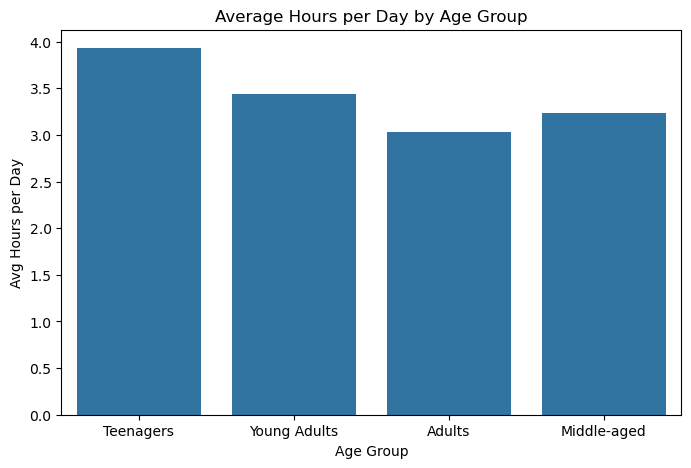

In [72]:
# Average hours per day by Age Group
bins = [0, 19, 29, 39, 100]
labels = ["Teenagers", "Young Adults", "Adults", "Middle-aged"]
df_clean["Age Group"] = pd.cut(df_clean["Age"], bins=bins, labels=labels)

age_hours = df_clean.groupby("Age Group")["Hours per day"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=age_hours.index, y=age_hours.values)
plt.title("Average Hours per Day by Age Group")
plt.ylabel("Avg Hours per Day")
plt.xlabel("Age Group")
plt.show()


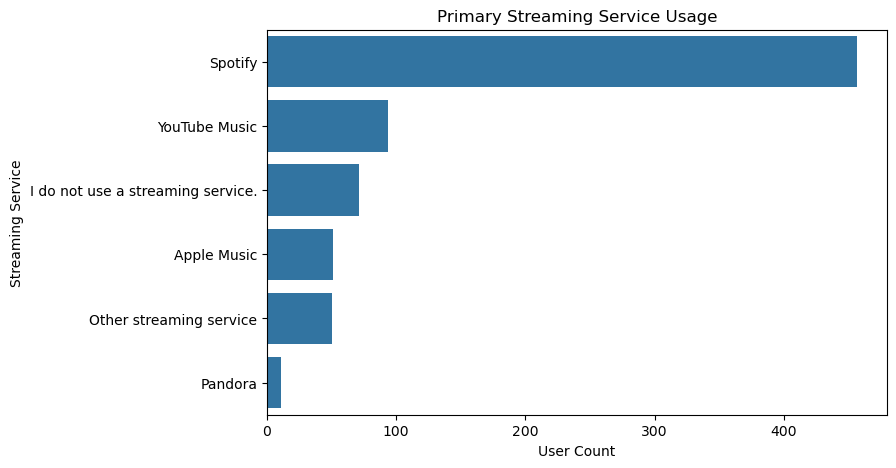

In [71]:
# Count of users by streaming service
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, y="Primary streaming service", order=df_clean["Primary streaming service"].value_counts().index)
plt.title("Primary Streaming Service Usage")
plt.xlabel("User Count")
plt.ylabel("Streaming Service")
plt.show()



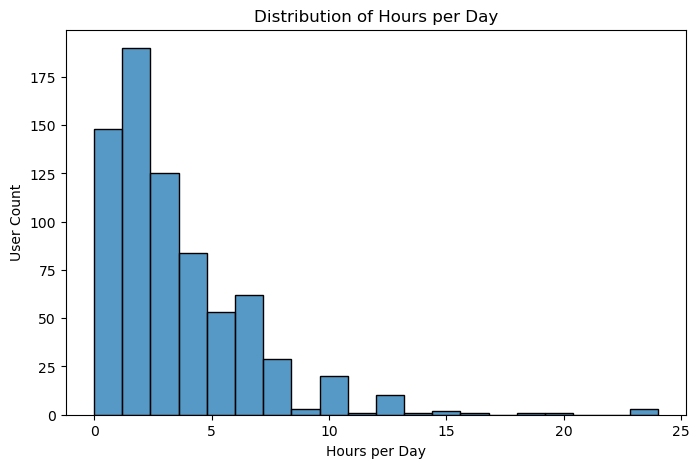

In [73]:
df_clean["Hours per day"] = pd.to_numeric(df_clean["Hours per day"], errors="coerce")

plt.figure(figsize=(8,5))
sns.histplot(data=df_clean, x="Hours per day", bins=20)
plt.title("Distribution of Hours per Day")
plt.xlabel("Hours per Day")
plt.ylabel("User Count")
plt.show()


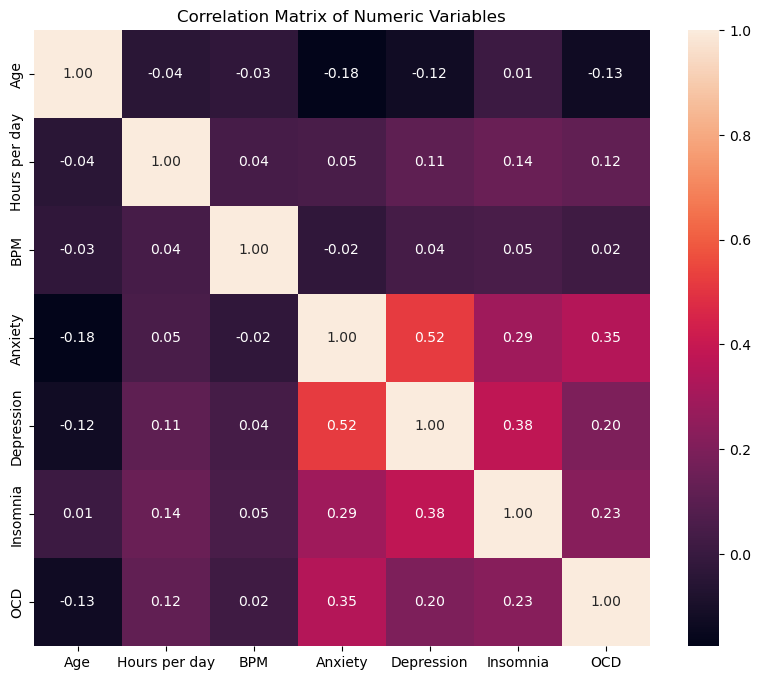

In [63]:
# Select numeric columns for correlation
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
corr_matrix = df_clean[numeric_cols].corr()

# Display correlation matrix
#print(corr_matrix)

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,  fmt=".2f", square=True, cbar=True)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


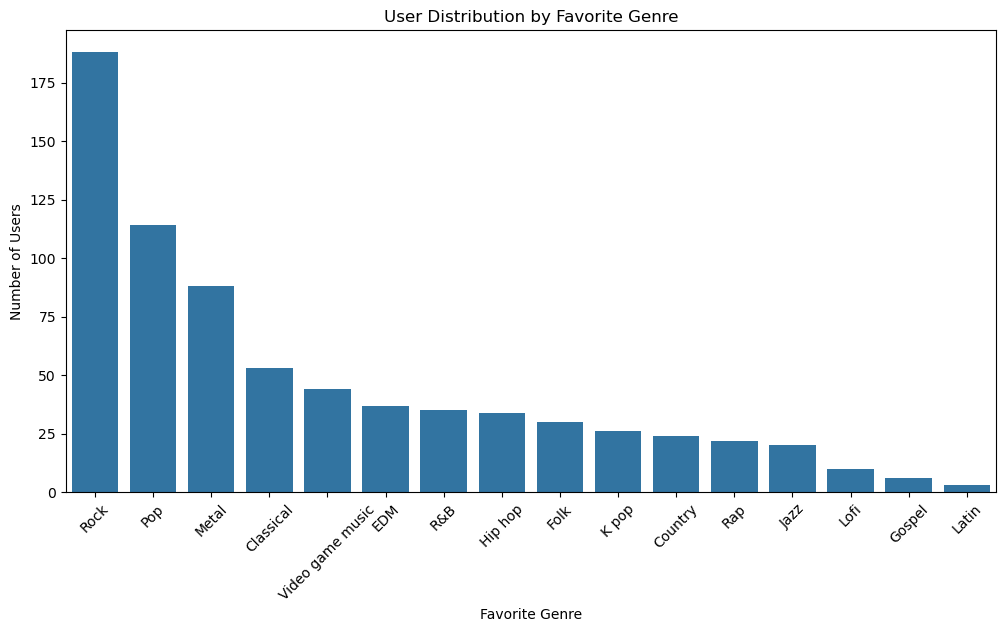

In [70]:
# Count users by favorite genre
genre_counts = df_clean["Fav genre"].value_counts()

# Percentage of users per genre
genre_percent = (genre_counts / len(df_clean)) * 100

"""
print("User distribution by favorite genre (count):")
print(genre_counts)

print("\nUser distribution by favorite genre (percentage):")
print(genre_percent)
"""
# Plot genre distribution
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title("User Distribution by Favorite Genre")
plt.ylabel("Number of Users")
plt.xlabel("Favorite Genre")
plt.xticks(rotation=45)
plt.show()


Percentage of users reporting improvement due to music: 73.57%


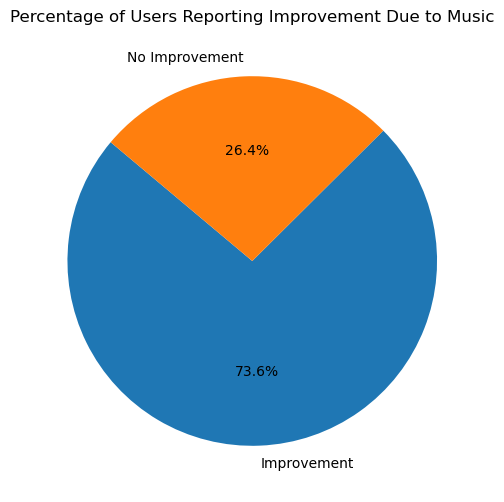

In [74]:
# Use correct improvement label matching based on data
improvement_labels = ["Improve", "Improvement", "Positive", "Better", "Yes"]

# Ensure df_clean is a copy to avoid warnings
df_clean = df_clean.copy()

# Create boolean column for improvement (case insensitive)
df_clean.loc[:, "Music Improvement"] = df_clean["Music effects"].str.contains('|'.join(improvement_labels), case=False, na=False)

# Calculate percentage
improvement_percent = df_clean["Music Improvement"].mean() * 100
print(f"Percentage of users reporting improvement due to music: {improvement_percent:.2f}%")

# Count values (True/False)
improvement_counts = df_clean["Music Improvement"].value_counts()

# Reindex to put True first for consistent labeling
improvement_counts = improvement_counts.reindex([True, False])

# Pie chart labels matching the order in reindex
labels = ["Improvement", "No Improvement"]

plt.figure(figsize=(6,6))
plt.pie(improvement_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Users Reporting Improvement Due to Music")
plt.show()



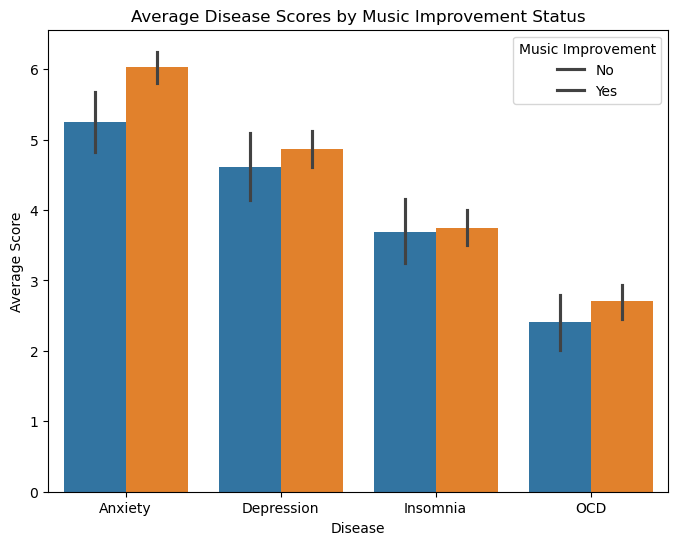

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean and std dev for each disease by music improvement status
disease_stats = df_clean.groupby("Music Improvement")[disease_cols].agg(['mean', 'std']).reset_index()

# Prepare data for plotting: melt dataframe to long format for seaborn
plot_data = df_clean.melt(id_vars='Music Improvement', value_vars=disease_cols, var_name='Disease', value_name='Score')

plt.figure(figsize=(8,6))
sns.barplot(x='Disease', y='Score', hue='Music Improvement', data=plot_data)
plt.title("Average Disease Scores by Music Improvement Status")
plt.xlabel("Disease")
plt.ylabel("Average Score")
plt.legend(title="Music Improvement", labels=["No", "Yes"])
plt.show()


In [37]:
#outlier 
sorted_val=df['Age'].sort_values()

q1=sorted_val.quantile(0.25)
q2=sorted_val.quantile(0.75)

IQR=q3-q1

lower=q1-1.5*IQR
upper=q2+1.5*IQR

print(IQR)
print(lower)
print(upper)

0.0
18.0
28.0


In [42]:
outliers = ((sorted_val < lower) | (sorted_val > upper))
print(len(outliers))

736


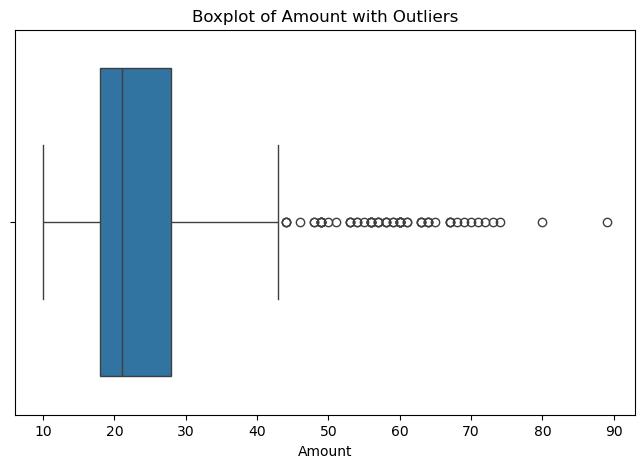

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Amount with Outliers')
plt.xlabel('Amount')
plt.show()